In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Data-Collisions.csv to Data-Collisions (2).csv


In [108]:
data = pd.read_csv('Data-Collisions.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [110]:
data.head()

SEVERITYCODE           X          Y  ...  SEGLANEKEY  CROSSWALKKEY  HITPARKEDCAR
0             2 -122.323148  47.703140  ...           0             0             N
1             1 -122.347294  47.647172  ...           0             0             N
2             1 -122.334540  47.607871  ...           0             0             N
3             1 -122.334803  47.604803  ...           0             0             N
4             2 -122.306426  47.545739  ...           0             0             N

[5 rows x 38 columns]

Following features has been dropped at the beginning because they do not carry any useful information:
- LOCATION,
- SEVERITYDESC, 
- COLLISIONTYPE,
- SDOT_COLCODE, 
- SDOT_COLDESC, 
- SDOTCOLNUM,
- ST_COLCODE,
- ST_COLDESC,
- SEGLANEKEY,
- CROSSWALKKEY,
- EXCEPTRSNCODE,
- EXCEPTRSNDESC,
- OBJECTID, 
- INCKEY,
- COLDETKEY,
- REPORTNO, 
- STATUS,
- ADDRYPE,
- INTKEY,
- SEVERITYCODE.1.

In [111]:
data.drop(['LOCATION', 'SEVERITYDESC', 'COLLISIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'SDOTCOLNUM', \
     'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'OBJECTID', 'INCKEY', \
          'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY'], axis=1, inplace=True)
print(data.shape)

(194673, 19)


In [112]:
data.head()

SEVERITYCODE           X          Y  ...  PEDROWNOTGRNT  SPEEDING  HITPARKEDCAR
0             2 -122.323148  47.703140  ...            NaN       NaN             N
1             1 -122.347294  47.647172  ...            NaN       NaN             N
2             1 -122.334540  47.607871  ...            NaN       NaN             N
3             1 -122.334803  47.604803  ...            NaN       NaN             N
4             2 -122.306426  47.545739  ...            NaN       NaN             N

[5 rows x 19 columns]

In [113]:
data.drop(['SEVERITYCODE.1'], axis=1, inplace=True)

In [114]:
data.head()

SEVERITYCODE           X          Y  ...  PEDROWNOTGRNT  SPEEDING  HITPARKEDCAR
0             2 -122.323148  47.703140  ...            NaN       NaN             N
1             1 -122.347294  47.647172  ...            NaN       NaN             N
2             1 -122.334540  47.607871  ...            NaN       NaN             N
3             1 -122.334803  47.604803  ...            NaN       NaN             N
4             2 -122.306426  47.545739  ...            NaN       NaN             N

[5 rows x 18 columns]

In [115]:
data['INATTENTIONIND'].isnull().sum() # it will be dropped later

164868

In [116]:
lightcond = data[['LIGHTCOND', 'SEVERITYCODE', 'INCDTTM']].groupby(['LIGHTCOND', 'SEVERITYCODE']).count()
lightcond.reset_index(inplace= True)
lightcond.columns=['LIGHTCOND', 'SEVERITYCODE', 'COUNT']
lightcond

LIGHTCOND  SEVERITYCODE  COUNT
0    Dark - No Street Lights             1   1203
1    Dark - No Street Lights             2    334
2   Dark - Street Lights Off             1    883
3   Dark - Street Lights Off             2    316
4    Dark - Street Lights On             1  34032
5    Dark - Street Lights On             2  14475
6    Dark - Unknown Lighting             1      7
7    Dark - Unknown Lighting             2      4
8                       Dawn             1   1678
9                       Dawn             2    824
10                  Daylight             1  77593
11                  Daylight             2  38544
12                      Dusk             1   3958
13                      Dusk             2   1944
14                     Other             1    183
15                     Other             2     52
16                   Unknown             1  12868
17                   Unknown             2    605

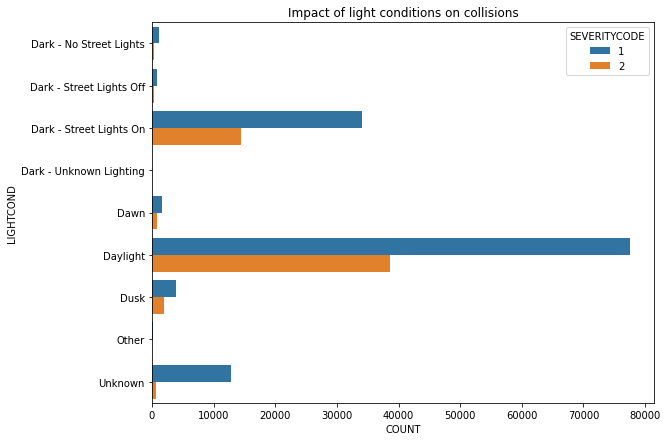

In [117]:
plt.figure(figsize = (9,7))
sns.barplot(data=lightcond, y='LIGHTCOND', x = 'COUNT', orient='h', hue='SEVERITYCODE')
plt.title('Impact of light conditions on collisions')
plt.show()

As we can see, light conditions has significant impact on the number of accidents and their severity, but it seems to be natural, as we travel the most during the day and most of roads are lighted. We should rather focus on light conditions' consequences on severity. In order to do that, we can transform our data into fractions for better readability:

In [118]:
lightcond_sum = lightcond.groupby(['LIGHTCOND'])[['COUNT']].sum()
lightcond_sum

COUNT
LIGHTCOND                       
Dark - No Street Lights     1537
Dark - Street Lights Off    1199
Dark - Street Lights On    48507
Dark - Unknown Lighting       11
Dawn                        2502
Daylight                  116137
Dusk                        5902
Other                        235
Unknown                    13473

In [119]:
lightcond = data[['LIGHTCOND', 'SEVERITYCODE', 'INCDTTM']].groupby(['LIGHTCOND', 'SEVERITYCODE']).count()
lightcond.columns=['COUNT']
lightcond

COUNT
LIGHTCOND                SEVERITYCODE       
Dark - No Street Lights  1              1203
                         2               334
Dark - Street Lights Off 1               883
                         2               316
Dark - Street Lights On  1             34032
                         2             14475
Dark - Unknown Lighting  1                 7
                         2                 4
Dawn                     1              1678
                         2               824
Daylight                 1             77593
                         2             38544
Dusk                     1              3958
                         2              1944
Other                    1               183
                         2                52
Unknown                  1             12868
                         2               605

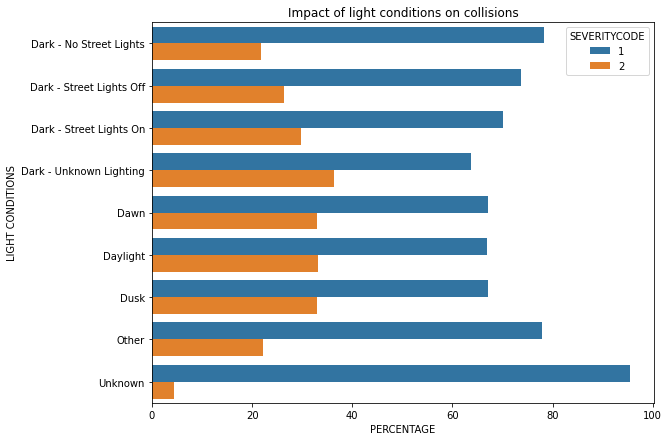

In [120]:
lightcond_percent = lightcond.div(lightcond_sum, level = 'LIGHTCOND')*100
lightcond_percent.reset_index(inplace=True)
lightcond_percent.columns=['LIGHT CONDITIONS', 'SEVERITYCODE', 'PERCENTAGE']
plt.figure(figsize = (9,7))
sns.barplot(data=lightcond_percent, y='LIGHT CONDITIONS', x = 'PERCENTAGE', orient='h', hue='SEVERITYCODE')
plt.title('Impact of light conditions on collisions')
plt.show()

It seems that there are quite significant differences in collisions' severity when it comes to different light conditions. It is especially noticable that there is less collisions involving injuries in the dark.

Now let's take into consideration junction type...

In [121]:
junction_type = data[['JUNCTIONTYPE', 'SEVERITYCODE', 'INCDTTM']].groupby(['JUNCTIONTYPE', 'SEVERITYCODE']).count()
junction_type.reset_index(inplace = True)
junction_type.columns=['JUNCTIONTYPE', 'SEVERITYCODE', 'COUNT']
junction_type

JUNCTIONTYPE  SEVERITYCODE  COUNT
0   At Intersection (but not related to intersection)             1   1475
1   At Intersection (but not related to intersection)             2    623
2              At Intersection (intersection related)             1  35636
3              At Intersection (intersection related)             2  27174
4                                   Driveway Junction             1   7437
5                                   Driveway Junction             2   3234
6                Mid-Block (but intersection related)             1  15493
7                Mid-Block (but intersection related)             2   7297
8             Mid-Block (not related to intersection)             1  70396
9             Mid-Block (not related to intersection)             2  19404
10                                      Ramp Junction             1    112
11                                      Ramp Junction             2     54
12                                            Unknown             1      7
13                                            Unknown             2      2

It seems that junction type has significant impact on the number of collisions and their severity. The most colisions take place at midblock and then at intersections. Most of people get injured in collisions at intersection. It makes sense, becacuse at midblock there could be for example a lot of parked cars that are potential objects to collide with. At intersections, in turn, there are most of crosswalks(and people as a result) and intesive traffic involving drivers and their passengers, so in comparison with midblock, there could be higher probability to injure people. 

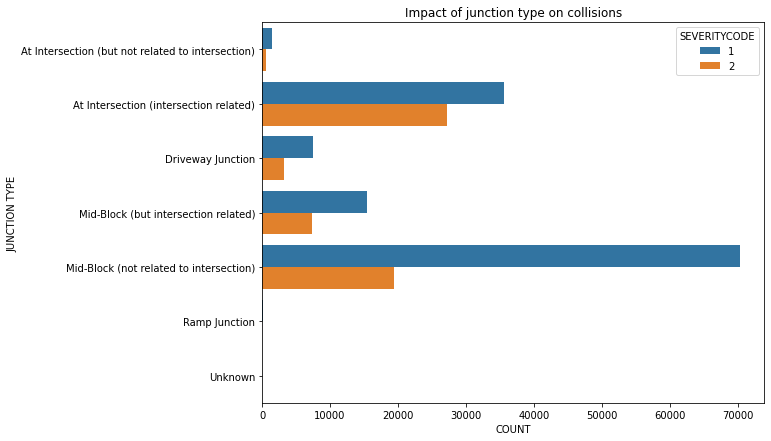

In [122]:
plt.figure(figsize = (9,7))
sns.barplot(data=junction_type, orient='h', x = 'COUNT', y = 'JUNCTIONTYPE', hue='SEVERITYCODE')
plt.title('Impact of junction type on collisions')
plt.ylabel('JUNCTION TYPE')
plt.show()

It is confirmed by more readable percentages - there are significant differences in collisions' severity in dependence of junction type.

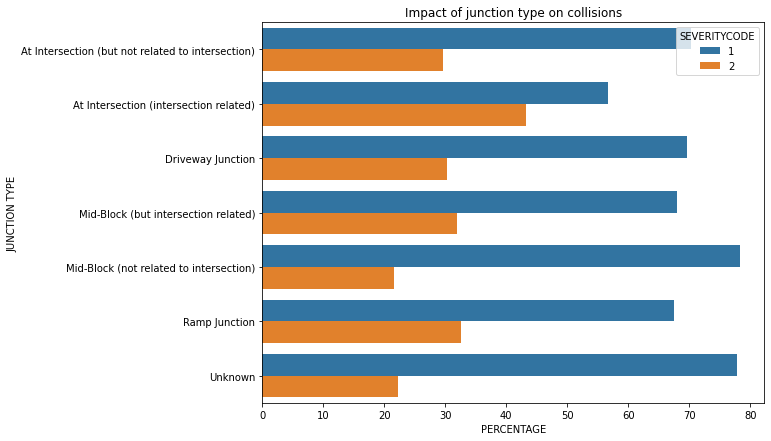

In [123]:
junction_type_sum = junction_type.groupby(['JUNCTIONTYPE'])[['COUNT']].sum()
junction_type = data[['JUNCTIONTYPE', 'SEVERITYCODE', 'INCDTTM']].groupby(['JUNCTIONTYPE', 'SEVERITYCODE']).count()
junction_type.columns=['COUNT']
junction_type_percent = junction_type.div(junction_type_sum, level='JUNCTIONTYPE')*100
junction_type_percent.reset_index(inplace= True)
junction_type_percent.columns=['JUNCTIONTYPE', 'SEVERITYCODE', 'PERCENTAGE']
plt.figure(figsize = (9,7))
sns.barplot(data=junction_type_percent, orient='h', x = 'PERCENTAGE', y = 'JUNCTIONTYPE', hue='SEVERITYCODE')
plt.title('Impact of junction type on collisions')
plt.ylabel('JUNCTION TYPE')
plt.show()

Attribute UNDERINFL that describes weather a driver involved was under the influence of drugs or alcohol takes 4 values: N, 0, Y and 1 and it is assumed that 0 is equal to N and 1 is equal to Y, so let's make it uniform. 

In [124]:
data['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [125]:
data['UNDERINFL'].replace(to_replace = ['N', 'Y'], value= [0,1], inplace = True)

In [126]:
data['UNDERINFL'].value_counts()

0    100274
0     80394
1      5126
1      3995
Name: UNDERINFL, dtype: int64

As it turned out, original 0 and 1 in this column were stored as strings, so let's make them integers:

In [127]:
data['UNDERINFL'].replace(to_replace = ['0', '1'], value= [0,1], inplace = True)
data['UNDERINFL'].value_counts()

0.0    180668
1.0      9121
Name: UNDERINFL, dtype: int64

In [128]:
under_influence = data[['UNDERINFL', 'SEVERITYCODE', 'INCDTTM']].groupby(['UNDERINFL', 'SEVERITYCODE']).count()
under_influence.reset_index(inplace = True)
under_influence.columns=['UNDERINFL', 'SEVERITYCODE', 'COUNT']
under_influence

UNDERINFL  SEVERITYCODE   COUNT
0        0.0             1  127071
1        0.0             2   53597
2        1.0             1    5559
3        1.0             2    3562

We can notice that overwhelming most of collisions happen involving sober drivers (which is probably because of the fact that most of people do not use stimulants before driving so it doesn't have to deny that drivers under influence cause more collisions). In fact, it's remarkable that collisions involving influenced drivers cause significantly more injuries than collisions caused by sober traffic participants.

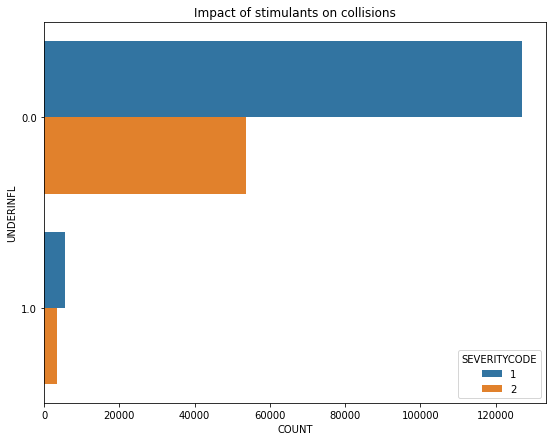

In [129]:
plt.figure(figsize = (9,7))
sns.barplot(data=under_influence, x='COUNT', y = 'UNDERINFL', hue = 'SEVERITYCODE', orient='h')
plt.title('Impact of stimulants on collisions')
plt.show()

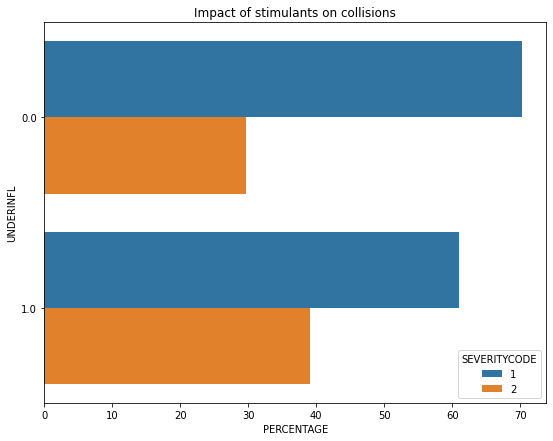

In [130]:
under_influence_sum = under_influence.groupby(['UNDERINFL'])[['COUNT']].sum()
under_influence = data[['UNDERINFL', 'SEVERITYCODE', 'INCDTTM']].groupby(['UNDERINFL', 'SEVERITYCODE']).count()
under_influence.columns=['COUNT']
under_influence_percent = under_influence.div(under_influence_sum, level='UNDERINFL')*100
under_influence_percent.reset_index(inplace = True)
under_influence_percent.columns=['UNDERINFL', 'SEVERITYCODE', 'PERCENTAGE']
plt.figure(figsize = (9,7))
sns.barplot(data=under_influence_percent, x='PERCENTAGE', y = 'UNDERINFL', hue = 'SEVERITYCODE', orient='h')
plt.title('Impact of stimulants on collisions')
plt.show()

In [131]:
weather = data[['WEATHER', 'SEVERITYCODE', 'INCDTTM']].groupby(['WEATHER', 'SEVERITYCODE']).count()
weather.reset_index(inplace = True)
weather.columns=['WEATHER', 'SEVERITYCODE', 'COUNT']
weather

WEATHER  SEVERITYCODE  COUNT
0          Blowing Sand/Dirt             1     41
1          Blowing Sand/Dirt             2     15
2                      Clear             1  75295
3                      Clear             2  35840
4             Fog/Smog/Smoke             1    382
5             Fog/Smog/Smoke             2    187
6                      Other             1    716
7                      Other             2    116
8                   Overcast             1  18969
9                   Overcast             2   8745
10             Partly Cloudy             1      2
11             Partly Cloudy             2      3
12                   Raining             1  21969
13                   Raining             2  11176
14          Severe Crosswind             1     18
15          Severe Crosswind             2      7
16  Sleet/Hail/Freezing Rain             1     85
17  Sleet/Hail/Freezing Rain             2     28
18                   Snowing             1    736
19                   Snowing             2    171
20                   Unknown             1  14275
21                   Unknown             2    816

Surprisingly, the most collisions happen when weather is clear, which may be because of the fact that people choose this weather to travel more often, especially cyclists and motorcyclists. It could be also caused by people's higher self-confidence and misleading feeeling of safety when the weather is beautiful what may result in higher speed and less attention payed. Finally, clear weather can be simply more frequent.

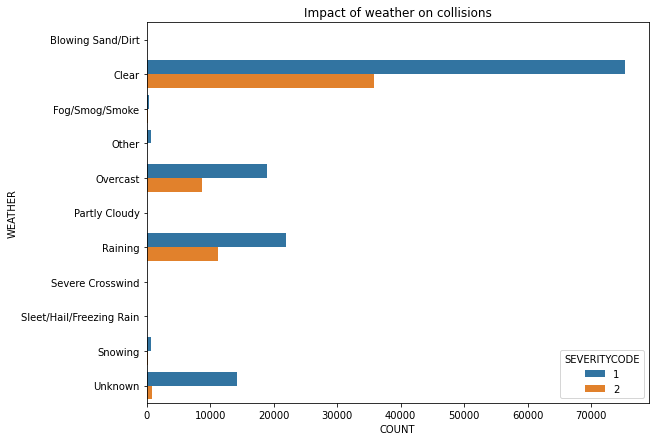

In [132]:
plt.figure(figsize = (9,7))
sns.barplot(data=weather, x='COUNT', y = 'WEATHER', hue = 'SEVERITYCODE', orient='h')
plt.title('Impact of weather on collisions')
plt.show()

Let's transform data into percentages to make impact of weather on collisions' severity more readable.

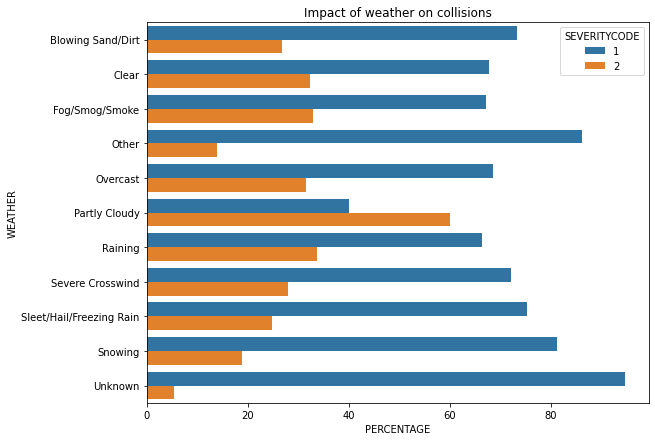

In [133]:
weather_sum = weather.groupby(['WEATHER'])[['COUNT']].sum()
weather = data[['WEATHER', 'SEVERITYCODE', 'INCDTTM']].groupby(['WEATHER', 'SEVERITYCODE']).count()
weather.columns = ['COUNT']
weather_percent = weather.div(weather_sum, level = 'WEATHER')*100
weather_percent.reset_index(inplace = True)
weather_percent.columns = ['WEATHER', 'SEVERITYCODE', 'PERCENTAGE']
plt.figure(figsize = (9,7))
sns.barplot(data=weather_percent, x='PERCENTAGE', y = 'WEATHER', hue = 'SEVERITYCODE', orient='h')
plt.title('Impact of weather on collisions')
plt.show()

It seems that weather has some impact on colissions' severity.

Speeding variable lacks most of entries, but it intuitively seems to be one of the most important features, so gaps probably doesn't mean lack of information, but mean that a driver was not speeding.

In [134]:
data['SPEEDING'].isnull().sum()

185340

In [135]:
data['SPEEDING'].replace(to_replace=['Y',np.nan], value=[1,0], inplace=True)
data['SPEEDING']

0         0
1         0
2         0
3         0
4         0
         ..
194668    0
194669    0
194670    0
194671    0
194672    0
Name: SPEEDING, Length: 194673, dtype: int64

In [136]:
speeding = data[['SPEEDING', 'SEVERITYCODE', 'INCDTTM']].groupby(['SPEEDING', 'SEVERITYCODE']).count()
speeding.reset_index(inplace = True)
speeding.columns=['SPEEDING', 'SEVERITYCODE', 'COUNT']
speeding

SPEEDING  SEVERITYCODE   COUNT
0         0             1  130683
1         0             2   54657
2         1             1    5802
3         1             2    3531

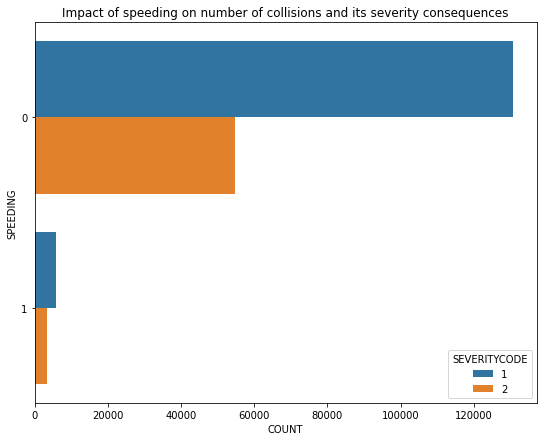

In [137]:
plt.figure(figsize = (9,7))
sns.barplot(data=speeding, x='COUNT', y = 'SPEEDING', hue = 'SEVERITYCODE', orient='h')
plt.title('Impact of speeding on number of collisions and its severity consequences')
plt.show()

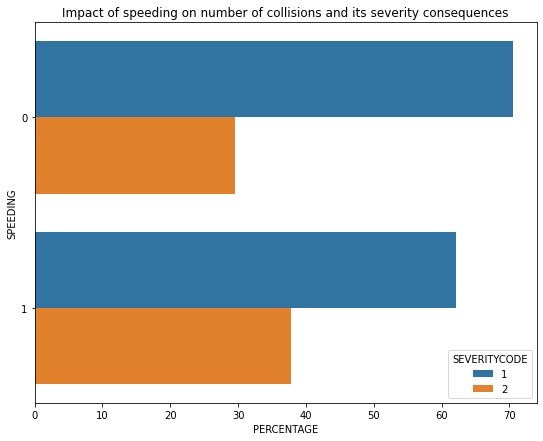

COUNT
SPEEDING        
0         185340
1           9333

In [138]:
speeding_sum = speeding.groupby(['SPEEDING'])[['COUNT']].sum()
speeding = data[['SPEEDING', 'SEVERITYCODE', 'INCDTTM']].groupby(['SPEEDING', 'SEVERITYCODE']).count()
speeding.columns=['COUNT']
speeding_percent = speeding.div(speeding_sum, level='SPEEDING')*100
speeding_percent.reset_index(inplace = True)
speeding_percent.columns = ['SPEEDING', 'SEVERITYCODE', 'PERCENTAGE']
plt.figure(figsize = (9,7))
sns.barplot(data=speeding_percent, x='PERCENTAGE', y = 'SPEEDING', hue = 'SEVERITYCODE', orient='h')
plt.title('Impact of speeding on number of collisions and its severity consequences')
plt.show()
speeding_sum

In [139]:
parked_car = data[['HITPARKEDCAR', 'SEVERITYCODE', 'INCDTTM']].groupby(['HITPARKEDCAR', 'SEVERITYCODE']).count()
parked_car.reset_index(inplace = True)
parked_car.columns=['HITPARKEDCAR', 'SEVERITYCODE', 'COUNT']
parked_car

HITPARKEDCAR  SEVERITYCODE   COUNT
0            N             1  129717
1            N             2   57740
2            Y             1    6768
3            Y             2     448

We can see that overwhelming most of collisions do not involve hitting a parked car. Moreover, collisions with parked cars hardly ever result in injuries in comparison to collisions without hitting such objects.

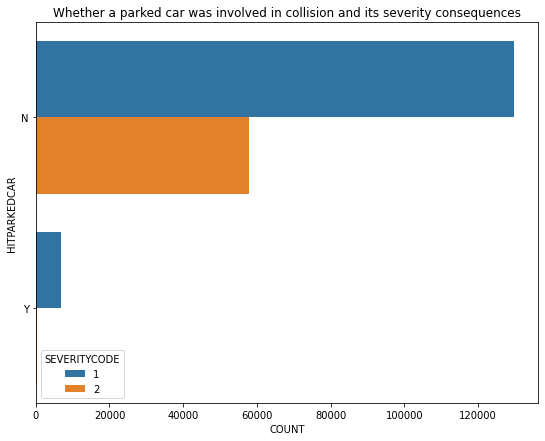

In [140]:
plt.figure(figsize = (9,7))
sns.barplot(data=parked_car, x='COUNT', y = 'HITPARKEDCAR', hue = 'SEVERITYCODE', orient='h')
plt.title('Whether a parked car was involved in collision and its severity consequences')
plt.show()

In [141]:
parked_car_sum = parked_car.groupby(['HITPARKEDCAR'])[['COUNT']].sum()
parked_car = data[['HITPARKEDCAR', 'SEVERITYCODE', 'INCDTTM']].groupby(['HITPARKEDCAR', 'SEVERITYCODE']).count()
parked_car.columns=['COUNT']
parked_car_percent = parked_car.div(parked_car_sum, level='HITPARKEDCAR')*100
parked_car_percent.reset_index(inplace = True)
parked_car_percent.columns = ['HITPARKEDCAR', 'SEVERITYCODE', 'PERCENTAGE']
plt.figure(figsize = (9,7))
sns.barplot(data=parked_car_percent, x='PERCENTAGE', y = 'HITPARKEDCAR', hue = 'SEVERITYCODE', orient='h')
plt.title('Whether a parked car was involved in collision and its severity consequences')
plt.show()
parked_car_percent

HITPARKEDCAR  SEVERITYCODE  PERCENTAGE
0            N             1   69.198269
1            N             2   30.801731
2            Y             1   93.791574
3            Y             2    6.208426

Feature PEDROWNOTGRNT turns out to be lacking a lot values. It will be dropped later.

In [142]:
data['PEDROWNOTGRNT'].isnull().sum()

190006

In [143]:
road_conditions = data[['ROADCOND', 'SEVERITYCODE', 'INCDTTM']].groupby(['ROADCOND', 'SEVERITYCODE']).count()
road_conditions.reset_index(inplace = True)
road_conditions.columns=['ROADCOND', 'SEVERITYCODE', 'COUNT']
road_conditions

ROADCOND  SEVERITYCODE  COUNT
0              Dry             1  84446
1              Dry             2  40064
2              Ice             1    936
3              Ice             2    273
4              Oil             1     40
5              Oil             2     24
6            Other             1     89
7            Other             2     43
8    Sand/Mud/Dirt             1     52
9    Sand/Mud/Dirt             2     23
10      Snow/Slush             1    837
11      Snow/Slush             2    167
12  Standing Water             1     85
13  Standing Water             2     30
14         Unknown             1  14329
15         Unknown             2    749
16             Wet             1  31719
17             Wet             2  15755

Feature ROADCOND is probably correlated with feature WEATHER and similarly do not carry much explaratory information.

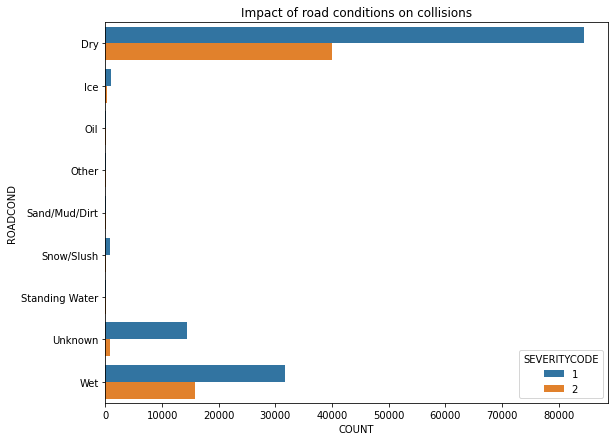

In [144]:
plt.figure(figsize = (9,7))
sns.barplot(data=road_conditions, x='COUNT', y = 'ROADCOND', hue = 'SEVERITYCODE', orient='h')
plt.title('Impact of road conditions on collisions')
plt.show()

It seems that during winter, i.e. when snow or ice is on the roads, there is much less injuries in collisions. Maybe because of extended attention paid by drivers. 

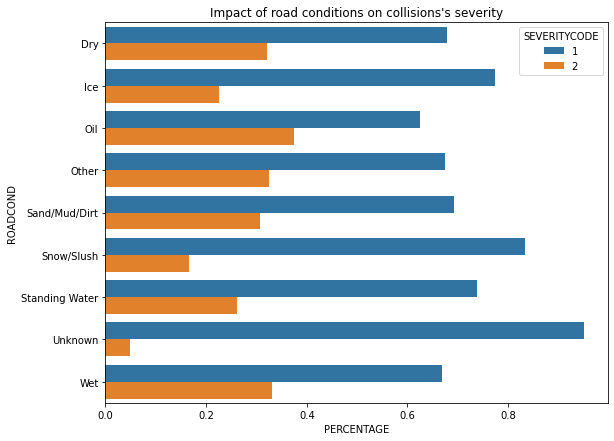

In [145]:
road_conditions_sum = road_conditions.groupby(['ROADCOND'])[['COUNT']].sum()
road_conditions = data[['ROADCOND', 'SEVERITYCODE', 'INCDTTM']].groupby(['ROADCOND', 'SEVERITYCODE']).count()
road_conditions.columns=['COUNT']
road_conditions_percent = road_conditions.div(road_conditions_sum, level='ROADCOND')
road_conditions_percent.reset_index(inplace = True)
road_conditions_percent.columns=['ROADCOND', 'SEVERITYCODE', 'PERCENTAGE']
plt.figure(figsize = (9,7))
sns.barplot(data=road_conditions_percent, x='PERCENTAGE', y = 'ROADCOND', hue = 'SEVERITYCODE', orient='h')
plt.title('Impact of road conditions on collisions\'s severity')
plt.show()

As a result of our initial analysis following features will be also dropped because of overwhelming lacks in values:
- PEDROWNOTGRNT,
- INATTENTIONIND.

In [146]:
data.drop(['PEDROWNOTGRNT', 'INATTENTIONIND'], axis=1, inplace=True)
print(data.shape)
data.head()

(194673, 16)


SEVERITYCODE           X  ...  SPEEDING  HITPARKEDCAR
0             2 -122.323148  ...         0             N
1             1 -122.347294  ...         0             N
2             1 -122.334540  ...         0             N
3             1 -122.334803  ...         0             N
4             2 -122.306426  ...         0             N

[5 rows x 16 columns]

In [147]:
data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR'],
      dtype='object')

Let's check wheter seasons of year have impact on collisions' severity. To do that, we have to engineer a new variable. We will assume that spring contains 3 first months, summer 3 subsequent months, etc.

In [148]:
strings = data['INCDATE'].str.split('/')

In [149]:
months = []
for i in strings.values:
    months.append(i[1])

In [150]:
import numpy as np
months = np.array(months)
months = months.astype('int64')
months

array([ 3, 12, 11, ...,  1,  1, 11])

In [151]:
data['MONTH'] = months
data.head()


SEVERITYCODE           X          Y  ...  SPEEDING  HITPARKEDCAR  MONTH
0             2 -122.323148  47.703140  ...         0             N      3
1             1 -122.347294  47.647172  ...         0             N     12
2             1 -122.334540  47.607871  ...         0             N     11
3             1 -122.334803  47.604803  ...         0             N      3
4             2 -122.306426  47.545739  ...         0             N      1

[5 rows x 17 columns]

In [152]:

data['SEASON'] = np.nan

In [153]:
data['SEASON'][(data['MONTH']>=1) & (data['MONTH']<=3)] = 'Spring'
data['SEASON'][(data['MONTH']>=4) & (data['MONTH']<=6)] = 'Summer'
data['SEASON'][(data['MONTH']>=7) & (data['MONTH']<=9)] = 'Autumn'
data['SEASON'][(data['MONTH']>=10) & (data['MONTH']<=12)] = 'Winter'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

As we can see, in every season of year there is almost the same number of collisions.

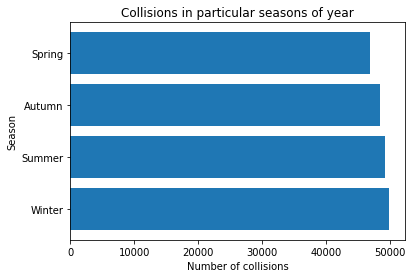

In [154]:
season = data['SEASON'].value_counts()
plt.barh(y= season.index, width=season)
plt.xlabel('Number of collisions')
plt.ylabel('Season')
plt.title('Collisions in particular seasons of year')
plt.show()

It seems that season of year has insignificant influence on severity of collisions.

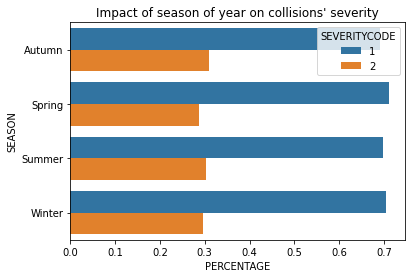

In [155]:
seasons = data[['SEASON', 'SEVERITYCODE', 'INCDTTM']].groupby(['SEASON', 'SEVERITYCODE']).count()
seasons.columns = ['COUNT']
seasons_sum = seasons.groupby(['SEASON'])[['COUNT']].sum()
seasons_percent = seasons.div(seasons_sum, level='SEASON')
seasons_percent.reset_index(inplace = True)
seasons_percent.columns=['SEASON', 'SEVERITYCODE', 'PERCENTAGE']
sns.barplot(data=seasons_percent, x='PERCENTAGE', y = 'SEASON', hue = 'SEVERITYCODE', orient='h')
plt.title('Impact of season of year on collisions\' severity')
plt.show()

It would be great to discover that in some places of Seattle, there is much more collisions than in others. If it turned out to be true, it could be very helpful in further analysis. We could focus on causes of such a state of affairs and help authorities to limit collisions and their negative consequences. To achieve that, we can use coordinates of our cases to cluster collisions and discover in which locations there is the highest density of collisions. In our case, we do not want to cluster all collisions at all costs, but we try to detect some gatherings of collisions, so we will use DBSCAN algorithm that is considered great for clustering spatial data.  

Unfortunately, 5334 collisions do not have coordinates, so we will drop them from our dataset.

In [156]:
print(data[['X', 'Y']].isnull().sum())
print('Shape of our data before dropping:', data.shape)

X    5334
Y    5334
dtype: int64
Shape of our data before dropping: (194673, 18)


In [157]:
data.dropna(axis=0, subset=['X', 'Y'], inplace=True)
print('Shape of our data after dropping:', data.shape)

Shape of our data after dropping: (189339, 18)


Firstly, we'll reduce our dataset to features that will be used in further analysis.

In [158]:
data_specified = data[['SEVERITYCODE', 'X', 'Y', 'SPEEDING','JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR']]
data_specified.head()

SEVERITYCODE           X  ...                LIGHTCOND  HITPARKEDCAR
0             2 -122.323148  ...                 Daylight             N
1             1 -122.347294  ...  Dark - Street Lights On             N
2             1 -122.334540  ...                 Daylight             N
3             1 -122.334803  ...                 Daylight             N
4             2 -122.306426  ...                 Daylight             N

[5 rows x 10 columns]

In [159]:
data_specified.isnull().sum()

SEVERITYCODE       0
X                  0
Y                  0
SPEEDING           0
JUNCTIONTYPE    4193
UNDERINFL       4737
WEATHER         4925
ROADCOND        4858
LIGHTCOND       5012
HITPARKEDCAR       0
dtype: int64

In [160]:
data_specified.dropna(inplace=True)
data_specified.isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


SEVERITYCODE    0
X               0
Y               0
SPEEDING        0
JUNCTIONTYPE    0
UNDERINFL       0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
HITPARKEDCAR    0
dtype: int64

We have to downsample our dataset because DBSCAN will not manage such a large dataset. We will sample 50000 collisions and maintain original fraction in our dataset. 

In [161]:
data_specified['SEVERITYCODE'].value_counts(normalize=True)

1    0.690026
2    0.309974
Name: SEVERITYCODE, dtype: float64

In [162]:
print('Number of collisions with SEVERITYCODE=1 to sample:', round(0.690026*50000))
print('Number of collisions with SEVERITYCODE=2 to sample:', round(0.309974*50000))

Number of collisions with SEVERITYCODE=1 to sample: 34501
Number of collisions with SEVERITYCODE=2 to sample: 15499


In [163]:
data_sample_1 = data_specified[data_specified['SEVERITYCODE']==1].sample(n=34501, random_state=0)
data_sample_2 = data_specified[data_specified['SEVERITYCODE']==2].sample(n=15499, random_state=0)
data_sample = pd.concat([data_sample_1, data_sample_2])
data_sample

SEVERITYCODE           X  ...                LIGHTCOND  HITPARKEDCAR
100566             1 -122.361477  ...                 Daylight             N
171613             1 -122.309683  ...  Dark - Street Lights On             N
65870              1 -122.301868  ...  Dark - Street Lights On             N
151984             1 -122.305478  ...  Dark - Street Lights On             N
53650              1 -122.334314  ...  Dark - Street Lights On             N
...              ...         ...  ...                      ...           ...
8902               2 -122.320780  ...                     Dusk             N
147212             2 -122.297247  ...                 Daylight             N
109862             2 -122.327292  ...                 Daylight             N
106196             2 -122.342634  ...  Dark - Street Lights On             N
85928              2 -122.360706  ...  Dark - Street Lights On             N

[50000 rows x 10 columns]

In [164]:
coordinates_data_sample = data_sample[['Y','X']]

In [165]:
from sklearn.cluster import DBSCAN

In [166]:
kms_per_radian = 6371.0088
epsilon = 0.5/kms_per_radian
dbscan = DBSCAN(eps=epsilon, algorithm='ball_tree', metric='haversine',min_samples=1000).fit(np.radians(coordinates_data_sample))

In [167]:
np.unique(dbscan.labels_)

array([-1,  0])

In [168]:
print('Number of core points, i.e. number of locations where in a radius of 0.5km there was at least 1000 collisions:', dbscan.core_sample_indices_.shape[0])

Number of core points, i.e. number of locations where in a radius of 0.5km there was at least 1000 collisions: 5944


All of those core points are located and grouped together in the city center.

In [169]:
data_sample['CLUSTER']=dbscan.labels_
data_sample.head()

SEVERITYCODE           X  ...  HITPARKEDCAR  CLUSTER
100566             1 -122.361477  ...             N       -1
171613             1 -122.309683  ...             N       -1
65870              1 -122.301868  ...             N       -1
151984             1 -122.305478  ...             N       -1
53650              1 -122.334314  ...             N       -1

[5 rows x 11 columns]

In [170]:
data_sample.groupby(['CLUSTER']).count().sort_values(by=['SEVERITYCODE'], ascending=False)

SEVERITYCODE      X      Y  ...  ROADCOND  LIGHTCOND  HITPARKEDCAR
CLUSTER                              ...                                   
-1              40205  40205  40205  ...     40205      40205         40205
 0               9795   9795   9795  ...      9795       9795          9795

[2 rows x 10 columns]

In [171]:
data_sample.groupby(['CLUSTER']).agg(pd.Series.mode)

SEVERITYCODE           X          Y  ...  ROADCOND LIGHTCOND  HITPARKEDCAR
CLUSTER                                       ...                                  
-1                  1 -122.332653  47.708655  ...       Dry  Daylight             N
 0                  1 -122.328079  47.604161  ...       Dry  Daylight             N

[2 rows x 10 columns]

In [172]:
import folium

In [173]:
data_sampleformap = data_sample[data_sample['CLUSTER']==0]#.sample(n=5000)
data_sampleformap.head()

SEVERITYCODE           X          Y  ...  LIGHTCOND HITPARKEDCAR  CLUSTER
96768              1 -122.337544  47.606122  ...   Daylight            N        0
165615             1 -122.335684  47.604927  ...       Dusk            N        0
14183              1 -122.336839  47.612897  ...   Daylight            N        0
112283             1 -122.333354  47.611606  ...   Daylight            N        0
147249             1 -122.317442  47.603515  ...   Daylight            Y        0

[5 rows x 11 columns]

In [174]:
seattle_map = folium.Map(height='80%', width='80%', location=[47.608013,-122.335167], zoom_start=12)
seattle_map

In [175]:
from folium import plugins
clust = plugins.MarkerCluster().add_to(seattle_map)
for lat, lng in zip(data_sampleformap.Y, data_sampleformap.X):
  folium.CircleMarker([lat, lng],radius=5, color='yellow',fill=True,fill_color='blue',fill_opacity=0.6).add_to(clust)
seattle_map

Let's check if there are some differences in features between our cluster and outliers.

In [176]:
data_junctiontype = data_sample.groupby(['CLUSTER','JUNCTIONTYPE'])[['SEVERITYCODE']].count()
data_junctiontype_sum = data_sample.groupby(['CLUSTER'])[['SEVERITYCODE']].count()
data_junctiontype_percent = data_junctiontype.div(data_junctiontype_sum, level = 'CLUSTER')*100
data_junctiontype_percent.reset_index(inplace=True)
data_junctiontype_percent.columns=['CLUSTER', 'JUNCTIONTYPE','PERCENTAGE']
sns.barplot(data=data_junctiontype_percent, x='PERCENTAGE', y = 'JUNCTIONTYPE', hue = 'CLUSTER', orient='h')
plt.title('Impact of junction type on collisions\' frequency')
plt.show()

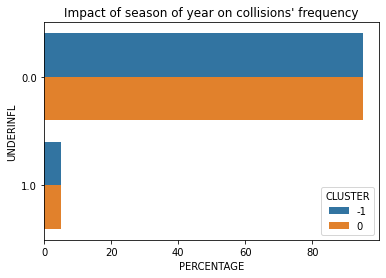

In [177]:
data_underinfl = data_sample.groupby(['CLUSTER','UNDERINFL'])[['SEVERITYCODE']].count()
data_underinfl_sum = data_sample.groupby(['CLUSTER'])[['SEVERITYCODE']].count()
data_underinfl_percent = data_underinfl.div(data_underinfl_sum, level = 'CLUSTER')*100
data_underinfl_percent.reset_index(inplace=True)
data_underinfl_percent.columns=['CLUSTER', 'UNDERINFL','PERCENTAGE']
sns.barplot(data=data_underinfl_percent, x='PERCENTAGE', y = 'UNDERINFL', hue = 'CLUSTER', orient='h')
plt.title('Impact of season of year on collisions\' frequency')
plt.show()

In [178]:
data_roadcond = data_sample.groupby(['CLUSTER','ROADCOND'])[['SEVERITYCODE']].count()
data_roadcond_sum = data_sample.groupby(['CLUSTER'])[['SEVERITYCODE']].count()
data_roadcond_percent = data_roadcond.div(data_roadcond_sum, level = 'CLUSTER')*100
data_roadcond_percent.reset_index(inplace=True)
data_roadcond_percent.columns=['CLUSTER', 'ROADCOND','PERCENTAGE']
sns.barplot(data=data_roadcond_percent, x='PERCENTAGE', y = 'ROADCOND', hue = 'CLUSTER', orient='h')
plt.title('Impact of season of year on collisions\' frequency')
plt.show()

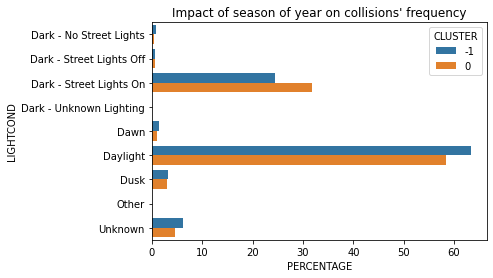

In [179]:
data_lightcond = data_sample.groupby(['CLUSTER','LIGHTCOND'])[['SEVERITYCODE']].count()
data_lightcond_sum = data_sample.groupby(['CLUSTER'])[['SEVERITYCODE']].count()
data_lightcond_percent = data_lightcond.div(data_lightcond_sum, level = 'CLUSTER')*100
data_lightcond_percent.reset_index(inplace=True)
data_lightcond_percent.columns=['CLUSTER', 'LIGHTCOND','PERCENTAGE']
sns.barplot(data=data_lightcond_percent, x='PERCENTAGE', y = 'LIGHTCOND', hue = 'CLUSTER', orient='h')
plt.title('Impact of season of year on collisions\' frequency')
plt.show()

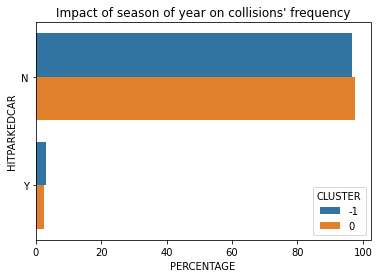

In [180]:
data_hitparkedcar = data_sample.groupby(['CLUSTER','HITPARKEDCAR'])[['SEVERITYCODE']].count()
data_hitparkedcar_sum = data_sample.groupby(['CLUSTER'])[['SEVERITYCODE']].count()
data_hitparkedcar_percent = data_hitparkedcar.div(data_hitparkedcar_sum, level = 'CLUSTER')*100
data_hitparkedcar_percent.reset_index(inplace=True)
data_hitparkedcar_percent.columns=['CLUSTER', 'HITPARKEDCAR','PERCENTAGE']
sns.barplot(data=data_hitparkedcar_percent, x='PERCENTAGE', y = 'HITPARKEDCAR', hue = 'CLUSTER', orient='h')
plt.title('Impact of season of year on collisions\' frequency')
plt.show()

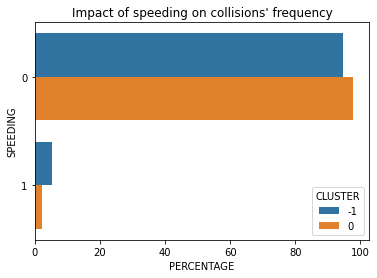

In [181]:
data_speeding = data_sample.groupby(['CLUSTER','SPEEDING'])[['SEVERITYCODE']].count()
data_speeding_sum = data_sample.groupby(['CLUSTER'])[['SEVERITYCODE']].count()
data_speeding_percent = data_speeding.div(data_speeding_sum, level = 'CLUSTER')*100
data_speeding_percent.reset_index(inplace=True)
data_speeding_percent.columns=['CLUSTER', 'SPEEDING','PERCENTAGE']
sns.barplot(data=data_speeding_percent, x='PERCENTAGE', y = 'SPEEDING', hue = 'CLUSTER', orient='h')
plt.title('Impact of speeding on collisions\' frequency')
plt.show()

In [182]:
data_specified = data_specified[['SEVERITYCODE', 'SPEEDING','JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR']]
data_specified.dtypes

SEVERITYCODE      int64
SPEEDING          int64
JUNCTIONTYPE     object
UNDERINFL       float64
WEATHER          object
ROADCOND         object
LIGHTCOND        object
HITPARKEDCAR     object
dtype: object

In [183]:
data_specified['UNDERINFL'] = data_specified['UNDERINFL'].astype('int64')
data_specified.head()

SEVERITYCODE  SPEEDING  ...                LIGHTCOND  HITPARKEDCAR
0             2         0  ...                 Daylight             N
1             1         0  ...  Dark - Street Lights On             N
2             1         0  ...                 Daylight             N
3             1         0  ...                 Daylight             N
4             2         0  ...                 Daylight             N

[5 rows x 8 columns]

In [184]:
data = pd.get_dummies(data_specified, drop_first = True)
data.head()

SEVERITYCODE  SPEEDING  ...  LIGHTCOND_Unknown  HITPARKEDCAR_Y
0             2         0  ...                  0               0
1             1         0  ...                  0               0
2             1         0  ...                  0               0
3             1         0  ...                  0               0
4             2         0  ...                  0               0

[5 rows x 36 columns]

In [185]:
X = data[['UNDERINFL','JUNCTIONTYPE_At Intersection (intersection related)','JUNCTIONTYPE_Driveway Junction', 'JUNCTIONTYPE_Mid-Block (but intersection related)', \
         'JUNCTIONTYPE_Mid-Block (not related to intersection)', 'JUNCTIONTYPE_Ramp Junction', 'JUNCTIONTYPE_Unknown', 'WEATHER_Clear', \
         'WEATHER_Fog/Smog/Smoke', 'WEATHER_Other', 'WEATHER_Overcast', 'WEATHER_Partly Cloudy', 'WEATHER_Raining', 'WEATHER_Severe Crosswind', \
         'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing', 'WEATHER_Unknown', 'ROADCOND_Ice', 'ROADCOND_Oil', 'ROADCOND_Other', \
         'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush', 'ROADCOND_Standing Water', 'ROADCOND_Unknown', 'ROADCOND_Wet', 'LIGHTCOND_Dark - Street Lights Off', \
         'LIGHTCOND_Dark - Street Lights On', 'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn', 'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk', 'LIGHTCOND_Other', \
         'LIGHTCOND_Unknown', 'HITPARKEDCAR_Y', 'SPEEDING']]
y = data[['SEVERITYCODE']]

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=0)
X_train

UNDERINFL  ...  SPEEDING
66422           0  ...         0
24973           0  ...         0
127748          0  ...         0
183991          1  ...         0
194552          0  ...         0
...           ...  ...       ...
147647          0  ...         0
146074          0  ...         0
82851           0  ...         0
189479          0  ...         0
117785          0  ...         0

[144068 rows x 35 columns]

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
forest = RandomForestClassifier(n_jobs=-1, n_estimators=25, random_state=0).fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [190]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [191]:
y_pred = forest.predict(X_train)
forest_f1_score = f1_score(y_true=y_train, y_pred = y_pred)*100 
forest_acc = accuracy_score(y_true=y_train, y_pred = y_pred)*100
print('f1 score:', forest_f1_score)
print('accuracy score:', forest_acc)

f1 score: 81.65303286259955
accuracy score: 69.39361967959574


In [192]:
y_pred_test = forest.predict(X_test)
forest_f1_score_test = f1_score(y_true=y_test, y_pred = y_pred_test)*100 
forest_acc_test = accuracy_score(y_true=y_test, y_pred = y_pred_test)*100
print('f1 score test set:', forest_f1_score_test)
print('accuracy test set:', forest_acc_test)

f1 score test set: 81.30895539769418
accuracy test set: 68.80726303514909


In [193]:
forest.feature_importances_.shape

(35,)

In [194]:
importances = pd.DataFrame()
importances['Feature']=X.columns
importances['Importance']=forest.feature_importances_
importances

Feature  Importance
0                                           UNDERINFL    0.037139
1   JUNCTIONTYPE_At Intersection (intersection rel...    0.300887
2                      JUNCTIONTYPE_Driveway Junction    0.011032
3   JUNCTIONTYPE_Mid-Block (but intersection related)    0.020551
4   JUNCTIONTYPE_Mid-Block (not related to interse...    0.140358
5                          JUNCTIONTYPE_Ramp Junction    0.001943
6                                JUNCTIONTYPE_Unknown    0.000190
7                                       WEATHER_Clear    0.014308
8                              WEATHER_Fog/Smog/Smoke    0.005202
9                                       WEATHER_Other    0.003317
10                                   WEATHER_Overcast    0.011547
11                              WEATHER_Partly Cloudy    0.000230
12                                    WEATHER_Raining    0.009633
13                           WEATHER_Severe Crosswind    0.000869
14                   WEATHER_Sleet/Hail/Freezing Rain    0.002874
15                                    WEATHER_Snowing    0.004757
16                                    WEATHER_Unknown    0.064503
17                                       ROADCOND_Ice    0.008730
18                                       ROADCOND_Oil    0.001778
19                                     ROADCOND_Other    0.003562
20                             ROADCOND_Sand/Mud/Dirt    0.002388
21                                ROADCOND_Snow/Slush    0.008540
22                            ROADCOND_Standing Water    0.002660
23                                   ROADCOND_Unknown    0.083191
24                                       ROADCOND_Wet    0.024065
25                 LIGHTCOND_Dark - Street Lights Off    0.005851
26                  LIGHTCOND_Dark - Street Lights On    0.018843
27                  LIGHTCOND_Dark - Unknown Lighting    0.000610
28                                     LIGHTCOND_Dawn    0.007384
29                                 LIGHTCOND_Daylight    0.031414
30                                     LIGHTCOND_Dusk    0.011196
31                                    LIGHTCOND_Other    0.002209
32                                  LIGHTCOND_Unknown    0.055617
33                                     HITPARKEDCAR_Y    0.061424
34                                           SPEEDING    0.041196

In [195]:
underinfl = importances.iloc[0,1]
junction_type = importances.iloc[1:7,1].sum()
weather = importances.iloc[7:17,1].sum()
roadcond = importances.iloc[17:25,1].sum()
lightcond = importances.iloc[25:33,1].sum()
hitparkedcar = importances.iloc[33,1]
speeding = importances.iloc[34,1]
importances = np.array([underinfl,junction_type,weather,roadcond,lightcond,hitparkedcar, speeding])
importances

array([0.03713943, 0.47496131, 0.1172405 , 0.13491441, 0.13312466,
       0.06142407, 0.04119561])

In [196]:
importances_df = pd.DataFrame()
importances_df['Feature'] = ['UNDERINFL','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','HITPARKEDCAR','SPEEDING']
importances_df['Importance'] = importances
importances_df.sort_values(by=['Importance'],ascending=False, inplace=True)
importances_df

Feature  Importance
1  JUNCTIONTYPE    0.474961
3      ROADCOND    0.134914
4     LIGHTCOND    0.133125
2       WEATHER    0.117241
5  HITPARKEDCAR    0.061424
6      SPEEDING    0.041196
0     UNDERINFL    0.037139

Indisputably, junction type is the most important feature for this classification task. As it turns out, it carries nearly 47% of discriminative information.  Secondly, there goes road conditions, light conditions and weather.

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [198]:
C_range = np.linspace(1.0, 100, 10)
lr = LogisticRegression(n_jobs=-1)
grid = GridSearchCV(estimator=lr, param_grid = {'C': C_range}, n_jobs=-1,cv=3, scoring='f1').fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [199]:
y_pred = grid.predict(X_train)
logistic_f1_score = f1_score(y_true=y_train, y_pred = y_pred)*100 
logistic_acc = accuracy_score(y_true=y_train, y_pred = y_pred)*100
print('f1 score:', logistic_f1_score)
print('accuracy score:', logistic_acc)


f1 score: 81.442420058472
accuracy score: 69.02643196268428


In [200]:
y_pred_test = grid.predict(X_test)
logistic_f1_score_test = f1_score(y_true=y_test, y_pred = y_pred_test)*100 
logistic_acc_test = accuracy_score(y_true=y_test, y_pred = y_pred_test)*100
print('f1 score test set:', logistic_f1_score_test)
print('accuracy test set:', logistic_acc_test)

f1 score test set: 81.29840773858992
accuracy test set: 68.76006441223832


In [201]:
results_train = pd.DataFrame()
results_train['LogisticRegression'] = [logistic_acc, logistic_f1_score]
results_train['RandomForest'] = [forest_acc, forest_f1_score]
results_train.index=['Accuracy', 'F1 score']
results_train


LogisticRegression  RandomForest
Accuracy           69.026432     69.393620
F1 score           81.442420     81.653033

In [202]:
results_test = pd.DataFrame()
results_test['LogisticRegression'] = [logistic_acc_test, logistic_f1_score_test]
results_test['RandomForest'] = [forest_acc_test, forest_f1_score_test]
results_test.index=['Accuracy', 'F1 score']
results_test

LogisticRegression  RandomForest
Accuracy           68.760064     68.807263
F1 score           81.298408     81.308955